# BY PRAVEEN K S 
[My linkedin profile kspraveen20](https://in.linkedin.com/in/kspraveen20)    
[My Github profile 0xlightning](https://github.com/0xlightning/)

Thanks for using my model.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# ignores warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('JobDataset.xlsx')
df = df.replace(-1, np.nan)
df

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Industry,Sector,Revenue,Competitors,Python,R Prog,Excel,Hadoop,SQL,SAS
0,Data Scientist,Site Name: India - Karnataka - Bangalore\nPost...,3.9,GSK,Bengaluru,"Brentford, United Kingdom",10000+ employees,1830.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,500+ billion (INR),"Pfizer, AstraZeneca, Merck",1,0,0,1,0,0
1,Data Scientist,Overview\n\n\nWe have an exciting opportunity ...,4.0,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,1 to 5 billion (INR),"GCE Solutions, Parexel, IQVIA",1,0,0,0,0,1
2,Data Scientist,Provide analytical insights into emerging prob...,3.5,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998.0,Company - Public,Internet,Information Technology,500+ billion (INR),"Square, Amazon, Apple",1,0,0,0,1,1
3,Data Scientist,"At Amazon, we strive to be most customer-centr...",4.2,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994.0,Company - Public,Internet,Information Technology,500+ billion (INR),"Google, Microsoft, Walmart",1,0,1,0,1,0
4,Data Scientist,"When everything's connected, how we connect is...",3.3,TTEC,Hyderabad,"Englewood, CO",10000+ employees,1982.0,Company - Public,Staffing & Outsourcing,Business Services,100 to 500 billion (INR),"Teleperformance, TaskUs, Convergys",1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Data Scientist,Position: Research Associate / Scientist\n\nLo...,4.7,String Bio,Bengaluru,"Bengaluru, India",1 to 50 employees,NaN,Company - Private,NaN,NaN,NaN,NaN,0,0,1,0,0,0
881,Data Scientist,Role and responsibilities:\nMost of the expect...,4.3,Think Analytics India,Mumbai,"Mumbai, India",1 to 50 employees,NaN,Company - Private,NaN,NaN,NaN,NaN,0,0,0,0,0,1
882,Data Scientist,Understand the project requirements and delive...,NaN,WDB Inida Private Limited,Hyderabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
883,Data Scientist,Worlds largest investment bank is looking to s...,4.0,The Edge Asia,Mumbai,"Hong Kong, Hong Kong",1 to 50 employees,2013.0,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN,1,0,0,0,0,0


In [5]:
print('Shape:',df.shape)
print(df.info())

Shape: (885, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job.Title          885 non-null    object 
 1   Job.Description    885 non-null    object 
 2   Rating             742 non-null    float64
 3   Company.Name       885 non-null    object 
 4   Location           873 non-null    object 
 5   Headquarters       813 non-null    object 
 6   Size               751 non-null    object 
 7   Founded            582 non-null    float64
 8   Type.of.ownership  784 non-null    object 
 9   Industry           636 non-null    object 
 10  Sector             637 non-null    object 
 11  Revenue            387 non-null    object 
 12  Competitors        246 non-null    object 
 13  Python             885 non-null    int64  
 14  R Prog             885 non-null    int64  
 15  Excel              885 non-null    int64  
 16  Hadoop   

In [6]:
df.isnull().sum()

Job.Title              0
Job.Description        0
Rating               143
Company.Name           0
Location              12
Headquarters          72
Size                 134
Founded              303
Type.of.ownership    101
Industry             249
Sector               248
Revenue              498
Competitors          639
Python                 0
R Prog                 0
Excel                  0
Hadoop                 0
SQL                    0
SAS                    0
dtype: int64

In [7]:
df.Rating.fillna(0.0,inplace=True)
df.Location.fillna('Not registered',inplace=True)
df.Headquarters.fillna('Not registered',inplace=True)
df.Size.fillna('Not registered',inplace=True)
df.Founded=df.Founded.astype('object')
df.Founded.fillna('Not submitted',inplace=True)
df['Type.of.ownership'].fillna('Not registered',inplace=True)
df.Industry.fillna('Not registered',inplace=True)
df.Sector.fillna('Not registered',inplace=True)
df.Revenue.fillna('Non Profitable',inplace=True)
df.Competitors.fillna('Not enough info',inplace=True)
df.isnull().sum()


Job.Title            0
Job.Description      0
Rating               0
Company.Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type.of.ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Python               0
R Prog               0
Excel                0
Hadoop               0
SQL                  0
SAS                  0
dtype: int64

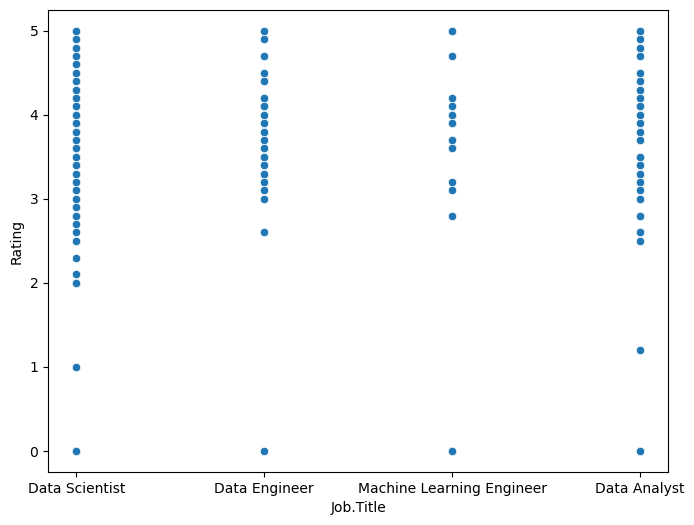

In [8]:
plt.figure(figsize=(8, 6))
sn.scatterplot(data=df,x=df['Job.Title'],y=df.Rating)
plt.show()

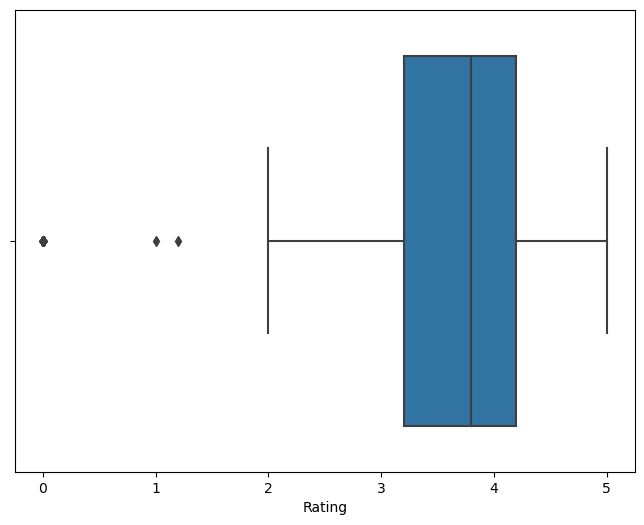

In [9]:
plt.figure(figsize=(8, 6))
sn.boxplot(x=df.Rating,data=df)
plt.show()

In [10]:
df[['Rating', 'Python', 'R Prog', 'Excel', 'Hadoop', 'SQL', 'SAS']].describe()

,Rating,Python,R Prog,Excel,Hadoop,SQL,SAS
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,3.225311,0.623729,0.030508,0.489266,0.235028,0.533333,0.138983
std,1.516930,0.484723,0.172079,0.500167,0.424256,0.499170,0.346124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.200000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
job_details = df.copy()
job_details

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Industry,Sector,Revenue,Competitors,Python,R Prog,Excel,Hadoop,SQL,SAS
0,Data Scientist,Site Name: India - Karnataka - Bangalore\nPost...,3.9,GSK,Bengaluru,"Brentford, United Kingdom",10000+ employees,1830.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,500+ billion (INR),"Pfizer, AstraZeneca, Merck",1,0,0,1,0,0
1,Data Scientist,Overview\n\n\nWe have an exciting opportunity ...,4.0,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,1 to 5 billion (INR),"GCE Solutions, Parexel, IQVIA",1,0,0,0,0,1
2,Data Scientist,Provide analytical insights into emerging prob...,3.5,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998.0,Company - Public,Internet,Information Technology,500+ billion (INR),"Square, Amazon, Apple",1,0,0,0,1,1
3,Data Scientist,"At Amazon, we strive to be most customer-centr...",4.2,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994.0,Company - Public,Internet,Information Technology,500+ billion (INR),"Google, Microsoft, Walmart",1,0,1,0,1,0
4,Data Scientist,"When everything's connected, how we connect is...",3.3,TTEC,Hyderabad,"Englewood, CO",10000+ employees,1982.0,Company - Public,Staffing & Outsourcing,Business Services,100 to 500 billion (INR),"Teleperformance, TaskUs, Convergys",1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Data Scientist,Position: Research Associate / Scientist\n\nLo...,4.7,String Bio,Bengaluru,"Bengaluru, India",1 to 50 employees,Not submitted,Company - Private,Not registered,Not registered,Non Profitable,Not enough info,0,0,1,0,0,0
881,Data Scientist,Role and responsibilities:\nMost of the expect...,4.3,Think Analytics India,Mumbai,"Mumbai, India",1 to 50 employees,Not submitted,Company - Private,Not registered,Not registered,Non Profitable,Not enough info,0,0,0,0,0,1
882,Data Scientist,Understand the project requirements and delive...,0.0,WDB Inida Private Limited,Hyderabad,Not registered,Not registered,Not submitted,Not registered,Not registered,Not registered,Non Profitable,Not enough info,0,0,0,0,0,0
883,Data Scientist,Worlds largest investment bank is looking to s...,4.0,The Edge Asia,Mumbai,"Hong Kong, Hong Kong",1 to 50 employees,2013.0,Company - Private,Staffing & Outsourcing,Business Services,Non Profitable,Not enough info,1,0,0,0,0,0


In [12]:
X = job_details.select_dtypes(include=['int','float'])
X

,Rating,Python,R Prog,Excel,Hadoop,SQL,SAS
0,3.9,1,0,0,1,0,0
1,4.0,1,0,0,0,0,1
2,3.5,1,0,0,0,1,1
3,4.2,1,0,1,0,1,0
4,3.3,1,0,1,0,0,1
...,...,...,...,...,...,...,...
880,4.7,0,0,1,0,0,0
881,4.3,0,0,0,0,0,1
882,0.0,0,0,0,0,0,0
883,4.0,1,0,0,0,0,0


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.4450242 ,  0.7766987 , -0.17739372, ...,  1.80410856,
        -1.06904497, -0.40176775],
       [ 0.51098407,  0.7766987 , -0.17739372, ..., -0.55429037,
        -1.06904497,  2.48900019],
       [ 0.1811847 ,  0.7766987 , -0.17739372, ..., -0.55429037,
         0.93541435,  2.48900019],
       ...,
       [-2.12741093, -1.28750055, -0.17739372, ..., -0.55429037,
        -1.06904497, -0.40176775],
       [ 0.51098407,  0.7766987 , -0.17739372, ..., -0.55429037,
        -1.06904497, -0.40176775],
       [ 0.37906432, -1.28750055, -0.17739372, ..., -0.55429037,
         0.93541435, -0.40176775]])

In [14]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_transform(X_scaled)
    inertia.append(kmeans.inertia_)
inertia

[6195.000000000001,
 5099.154779952821,
 4329.201601939172,
 3484.185580071754,
 2892.6038854174503,
 2484.876442235368,
 2256.6462430423826,
 2034.0816129168438,
 1891.520554739628,
 1750.7797444195214]

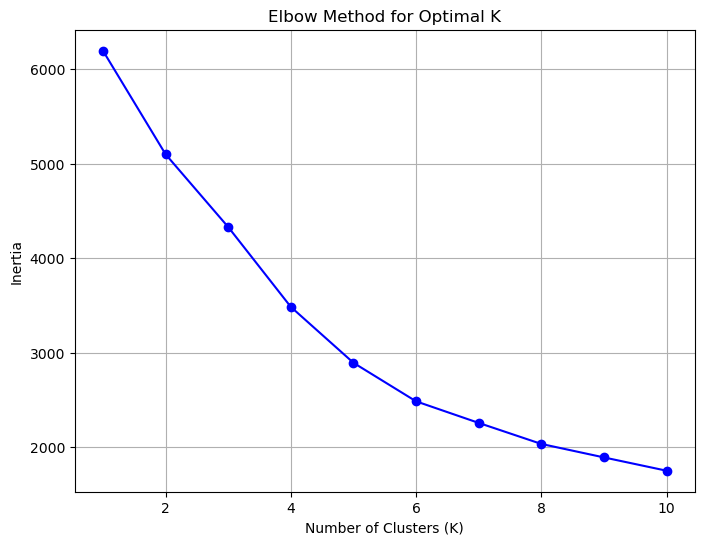

In [15]:
# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1,11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [16]:
# Based on the Elbow method, choose the optimal K (e.g., K=3)
optimal_k = 3

# Perform K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [17]:
# Add the cluster labels to the original DataFrame
job_details['Cluster'] = kmeans.labels_

# View the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)

# Display the cluster centers
print("Cluster Centers:")
cluster_centers

Cluster Centers:


,Rating,Python,R Prog,Excel,Hadoop,SQL,SAS
0,3.390244,0.642276,3.252033e-02,0.593496,0.300813,0.796748,1.000000e+00
1,3.358263,0.941176,6.442577e-02,0.535014,0.459384,0.868347,2.220446e-16
2,3.058025,0.338272,6.938894e-18,0.417284,0.017284,0.158025,2.498002e-16


In [18]:
# Display the DataFrame with cluster labels
print("Job Details with Cluster Labels:")
job_details.head()

Job Details with Cluster Labels:


,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Industry,Sector,Revenue,Competitors,Python,R Prog,Excel,Hadoop,SQL,SAS,Cluster
0,Data Scientist,Site Name: India - Karnataka - Bangalore\nPost...,3.9,GSK,Bengaluru,"Brentford, United Kingdom",10000+ employees,1830.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,500+ billion (INR),"Pfizer, AstraZeneca, Merck",1,0,0,1,0,0,1
1,Data Scientist,Overview\n\n\nWe have an exciting opportunity ...,4.0,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,1 to 5 billion (INR),"GCE Solutions, Parexel, IQVIA",1,0,0,0,0,1,0
2,Data Scientist,Provide analytical insights into emerging prob...,3.5,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998.0,Company - Public,Internet,Information Technology,500+ billion (INR),"Square, Amazon, Apple",1,0,0,0,1,1,0
3,Data Scientist,"At Amazon, we strive to be most customer-centr...",4.2,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994.0,Company - Public,Internet,Information Technology,500+ billion (INR),"Google, Microsoft, Walmart",1,0,1,0,1,0,1
4,Data Scientist,"When everything's connected, how we connect is...",3.3,TTEC,Hyderabad,"Englewood, CO",10000+ employees,1982.0,Company - Public,Staffing & Outsourcing,Business Services,100 to 500 billion (INR),"Teleperformance, TaskUs, Convergys",1,0,1,0,0,1,0


In [19]:
job_details.Cluster.unique()

array([1, 0, 2])

# BY PRAVEEN K S 
[My linkedin profile kspraveen20](https://in.linkedin.com/in/kspraveen20)    
[My Github profile 0xlightning](https://github.com/0xlightning/)

Thanks for using my model.